# business problem 

- Digital payments are evolving, but so are cyber criminals.

- According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

- In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as pt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# undestanding the columns

- distance_from_home - the distance from home where the transaction happened.
- distance_from_last_transaction - the distance from last transaction happened.

- ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

- repeat_retailer - Is the transaction happened from same retailer.

- used_chip - Is the transaction through chip (credit card).

- used_pin_number - Is the transaction happened by using PIN number.

- online_order - Is the transaction an online order.

- fraud - Is the transaction fraudulent.

In [3]:
df.shape

(1000000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [6]:
df["distance_from_home"].nunique()

1000000

In [7]:
df['distance_from_last_transaction'].nunique()

1000000

In [ ]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)

df

In [8]:
df['ratio_to_median_purchase_price'].nunique()

1000000

In [9]:
df['repeat_retailer'].unique()

array([1., 0.])

In [10]:
df['repeat_retailer'].value_counts()

repeat_retailer
1.0    881536
0.0    118464
Name: count, dtype: int64

In [11]:
df['used_chip'].unique()

array([1., 0.])

In [12]:
df['used_chip'].value_counts()

used_chip
0.0    649601
1.0    350399
Name: count, dtype: int64

In [13]:
df['used_pin_number'].unique()

array([0., 1.])

In [14]:
df['used_pin_number'].value_counts()

used_pin_number
0.0    899392
1.0    100608
Name: count, dtype: int64

In [15]:
df['online_order'].unique()

array([0., 1.])

In [16]:
df['online_order'].value_counts()

online_order
1.0    650552
0.0    349448
Name: count, dtype: int64

In [17]:
df['fraud'].unique()

array([0., 1.])

In [18]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [19]:
continuous =['distance_from_home', 
             'distance_from_last_transaction',
             'ratio_to_median_purchase_price']

discrete =['repeat_retailer',
            'used_chip',
            'used_pin_number', 
            'online_order', 
            'fraud']

In [20]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

# exploratory data analysis 
### for continuous data 

In [21]:
df[continuous].describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182
std,65.390784,25.843093,2.799589
min,0.004874,0.000118,0.004399
25%,3.878008,0.296671,0.475673
50%,9.967760,0.998650,0.997717
75%,25.743985,3.355748,2.096370
max,10632.723672,11851.104565,267.802942


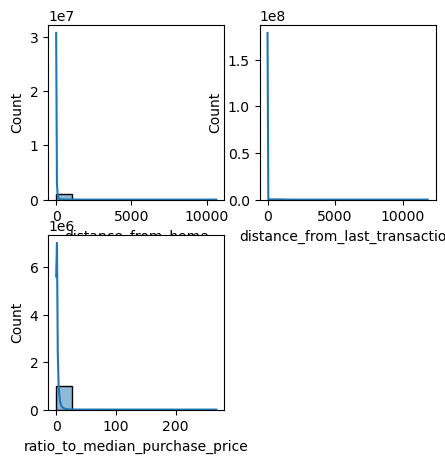

In [22]:
pt.figure(figsize=(5,5))
pt.subplot(2,2,1)
sn.histplot(df["distance_from_home"],bins=10, kde=True)
pt.subplot(2,2,2)
sn.histplot(df['distance_from_last_transaction'],bins= 10, kde=True)
pt.subplot(2,2,3)
sn.histplot(df['ratio_to_median_purchase_price'],bins= 10, kde= True)
pt.show()

In [23]:
df[continuous].skew()

distance_from_home                 20.239733
distance_from_last_transaction    125.921226
ratio_to_median_purchase_price      8.915015
dtype: float64

In [24]:
df[continuous].isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
dtype: int64

In [25]:
df[continuous].duplicated().sum()

0

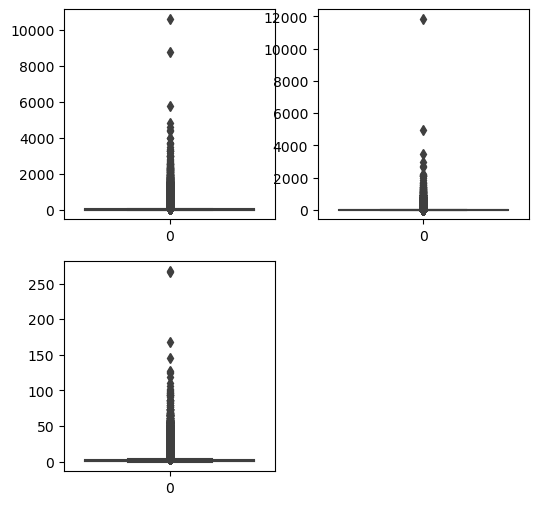

In [26]:
pt.figure(figsize=(6,6))
pt.subplot(2,2,1)
sn.boxplot(df['distance_from_home'])
pt.subplot(2,2,2)
sn.boxplot(df["distance_from_last_transaction"])
pt.subplot(2,2,3)
sn.boxplot(df['ratio_to_median_purchase_price'])
pt.show()

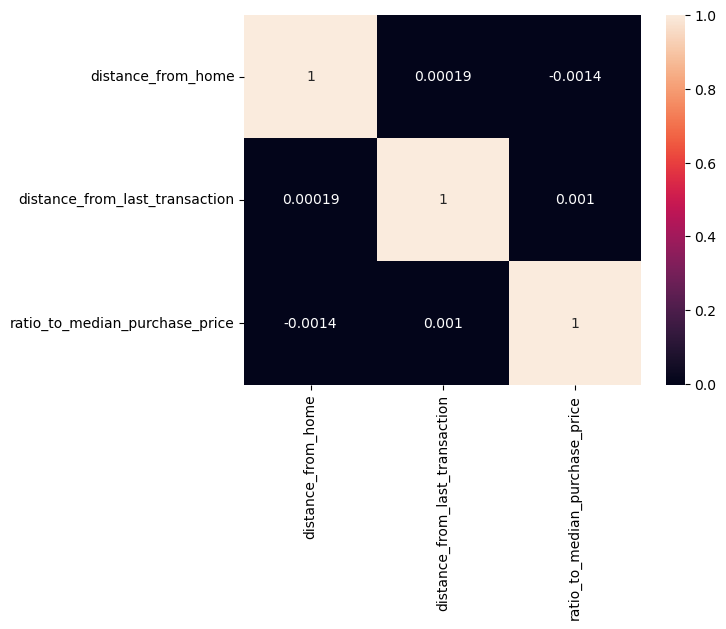

In [27]:
sn.heatmap(df[continuous].corr(),annot=True)
pt.show()

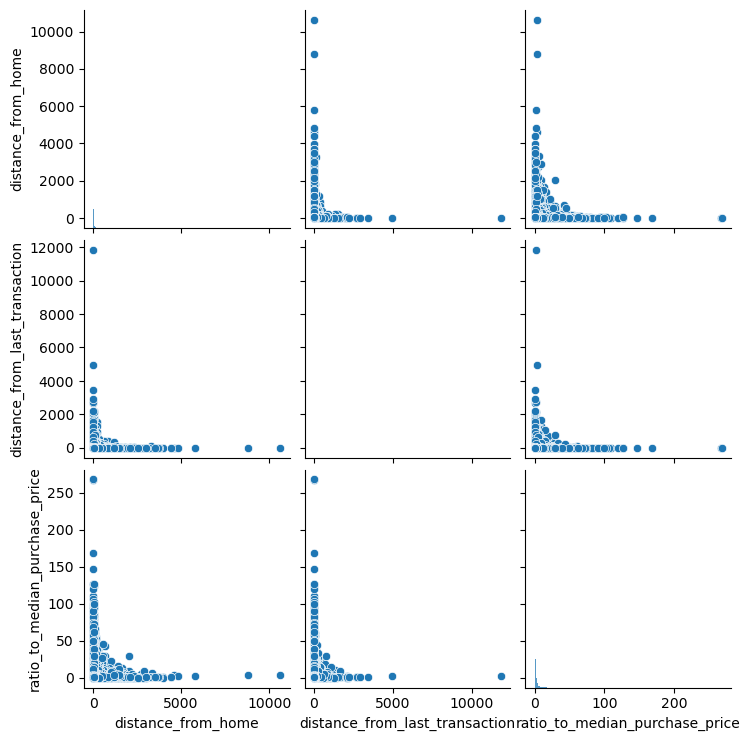

In [28]:
sn.pairplot(df[continuous])
pt.show()

### for dicrete vaiable 


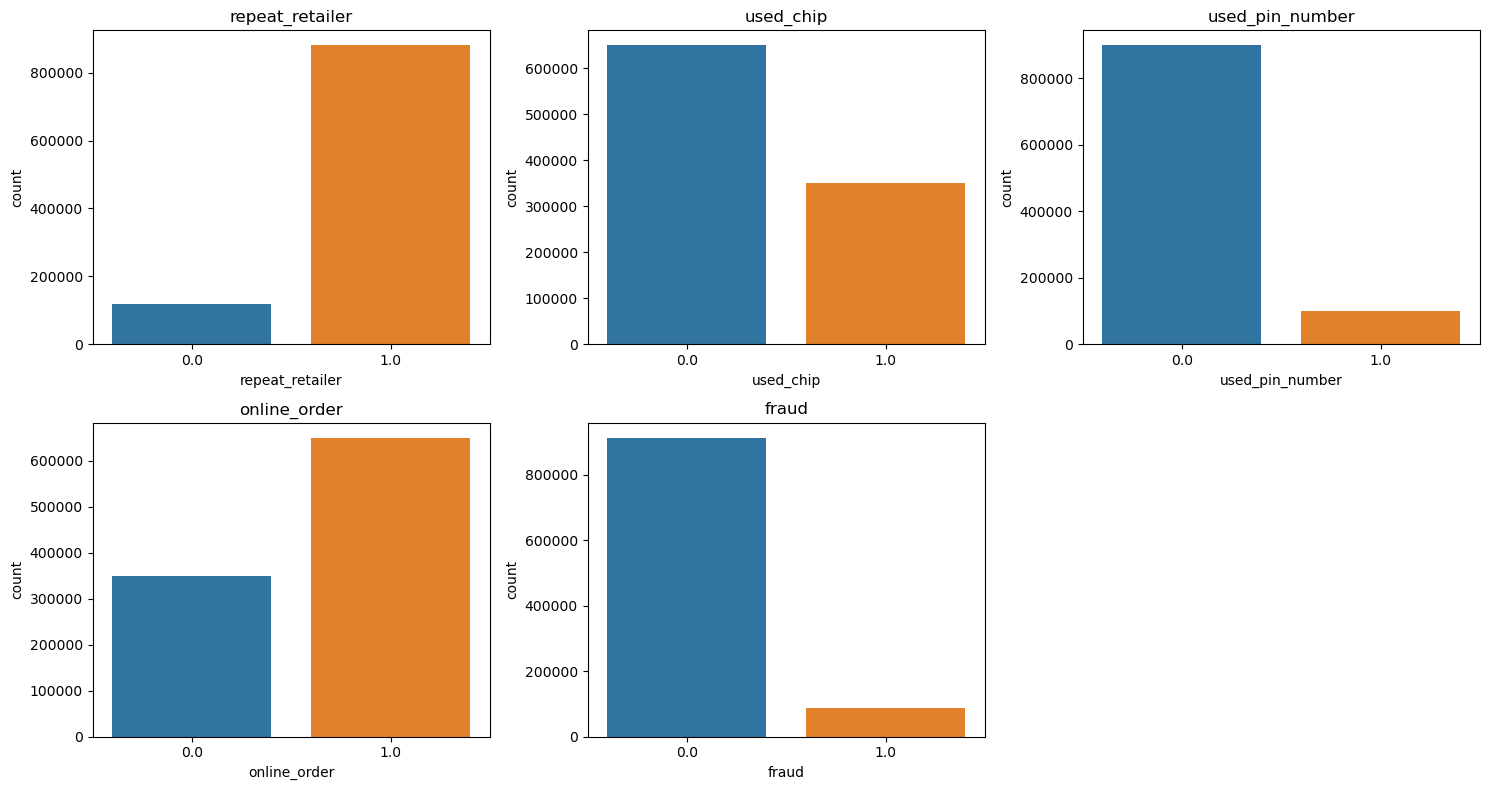

In [29]:
pt.figure(figsize=(15,8))
for i,column in enumerate (discrete,1):
    pt.subplot(2,3,i)
    sn.countplot(x= column,data=df)
    pt.title(column)
pt.tight_layout ()
pt.show()

In [30]:
df[discrete].describe()

,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.881536,0.350399,0.100608,0.650552,0.087403
std,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
col=df[discrete]
for crossdata in col:
    print(f'Imapact of {crossdata} on tha froud')
    print(pd.crosstab(df[crossdata],df['fraud']))
    print('\n')

Imapact of repeat_retailer on tha froud
fraud               0.0    1.0
repeat_retailer               
0.0              107986  10478
1.0              804611  76925


Imapact of used_chip on tha froud
fraud         0.0    1.0
used_chip               
0.0        584608  64993
1.0        327989  22410


Imapact of used_pin_number on tha froud
fraud               0.0    1.0
used_pin_number               
0.0              812262  87130
1.0              100335    273


Imapact of online_order on tha froud
fraud            0.0    1.0
online_order               
0.0           344756   4692
1.0           567841  82711


Imapact of fraud on tha froud
fraud     0.0    1.0
fraud               
0.0    912597      0
1.0         0  87403




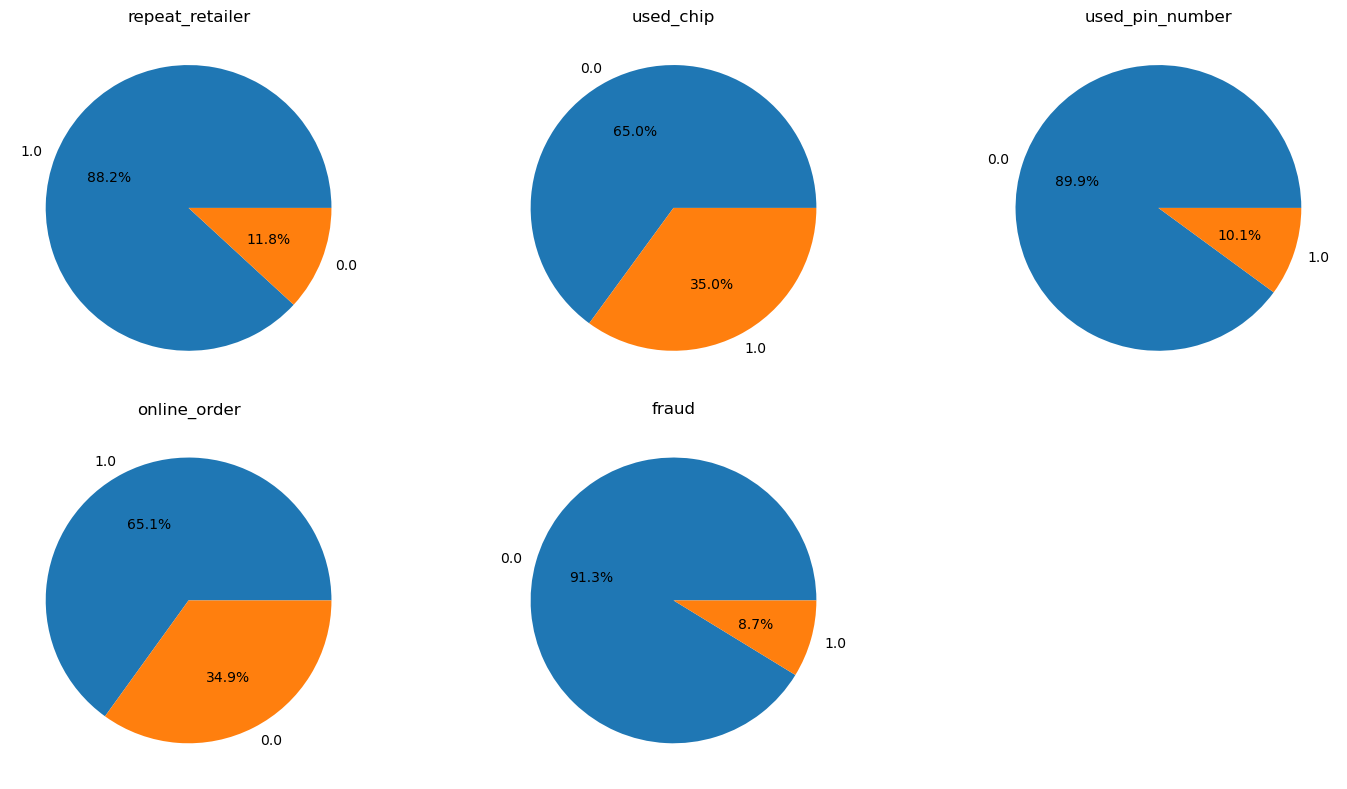

In [32]:
pt.figure(figsize=(15,8))
for i,column in enumerate (discrete,1):
    pt.subplot(2,3,i)
    pt.pie(df[column].value_counts(),
       labels =df[column].value_counts().index.tolist(),
        autopct="%0.1f%%")
    pt.title(column)
pt.tight_layout ()
pt.show()

# data cleaning 

In [33]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [34]:
df.skew()

distance_from_home                 20.239733
distance_from_last_transaction    125.921226
ratio_to_median_purchase_price      8.915015
repeat_retailer                    -2.361310
used_chip                           0.627134
used_pin_number                     2.655457
online_order                       -0.631517
fraud                               2.921824
dtype: float64

### data type converter

In [35]:
df['repeat_retailer']=df['repeat_retailer'].astype(int)
df['used_chip']=df['used_chip'].astype(int)
df['used_pin_number']=df['used_pin_number'].astype(int)
df['online_order']=df['online_order'].astype(int)
df['fraud']=df['fraud'].astype(int)


In [36]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int32
used_chip                           int32
used_pin_number                     int32
online_order                        int32
fraud                               int32
dtype: object

# feature transformation 


In [37]:
df['distance_from_home']=df['distance_from_home']**(1/6)
df['distance_from_home'].skew()

0.721641832303965

In [38]:
df['distance_from_last_transaction']=df["distance_from_last_transaction"]**(1/6)
df['distance_from_last_transaction']

0         0.823176
1         0.748314
2         0.964524
3         1.332596
4         0.909630
            ...   
999995    0.694954
999996    1.178857
999997    1.066641
999998    0.789423
999999    0.826221
Name: distance_from_last_transaction, Length: 1000000, dtype: float64

In [39]:
df['ratio_to_median_purchase_price']=df['ratio_to_median_purchase_price']**(1/4)
df['ratio_to_median_purchase_price'].skew()

0.8596996282363061

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report 
from sklearn.ensemble import GradientBoostingClassifier

# model  creation 


In [41]:
from imblearn.under_sampling import RandomUnderSampler
X= df.drop("fraud",axis=1)
y=df['fraud']

rus = RandomUnderSampler(random_state=42)
X_resample,y_resample=rus.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X_resample,y_resample,train_size=0.8,random_state=42)

# logistic regression 

In [42]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
print("coefficient :",log_model.coef_)
print("intercept :",log_model.intercept_)

log_ypred_train=log_model.predict(X_train)
print(" train accuracy :", accuracy_score(y_train,log_ypred_train))
print("cross val :",cross_val_score(log_model,X_train,y_train,cv=5,scoring="accuracy").mean())
log_ypred_test =log_model.predict(X_test)
print("test accuracy :",accuracy_score(y_test,log_ypred_test))

coefficient : [[ 4.30307682  2.15718248  8.20020168 -2.99983031 -1.17989373 -6.20146957
   4.12234933]]
intercept : [-19.57474488]
 train accuracy : 0.8906853350876691
cross val : 0.8908998545545644
test accuracy : 0.8905955036897203


In [43]:
print(confusion_matrix(y_test,log_ypred_test))
print('\n')
print(classification_report(y_test,log_ypred_test))

[[15303  2171]
 [ 1654 15834]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89     17474
           1       0.88      0.91      0.89     17488

    accuracy                           0.89     34962
   macro avg       0.89      0.89      0.89     34962
weighted avg       0.89      0.89      0.89     34962



auc score : 0.8905895647235819


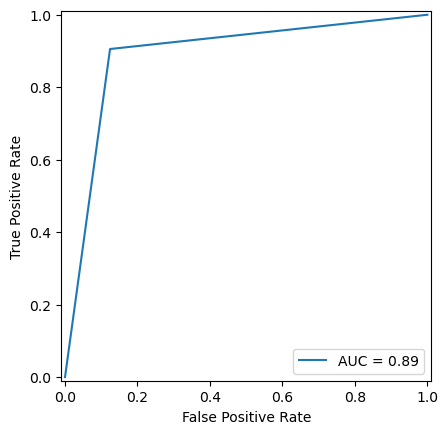

In [44]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay,roc_auc_score

fpr,tpr,thresholds = roc_curve(y_test,log_ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

print("auc score :",roc_auc_score(y_test,log_ypred_test))

# model selection 


# knn

In [45]:
estimator= KNeighborsClassifier()
param_grid ={"n_neighbors":list(range(1,50)),'p':[1,2]}
kn_model = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
kn_model.fit(X_train,y_train)
kn_model.best_estimator_

KNeighborsClassifier(n_neighbors=4, p=1)

In [51]:
knn_model=KNeighborsClassifier(n_neighbors=4,p=1)

knn_model.fit(X_train,y_train)


knn_ypred_train=knn_model.predict(X_train)
print(" train accuracy :",accuracy_score(y_train,knn_ypred_train))
print("cross val score :",cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())
knn_ypred_test=knn_model.predict(X_test)
print(" test accuracy score :",accuracy_score(y_test,knn_ypred_test))

 train accuracy : 0.996810731958468
cross val score : 0.9935714147356508
 test accuracy score : 0.993335621531949


# decission tree

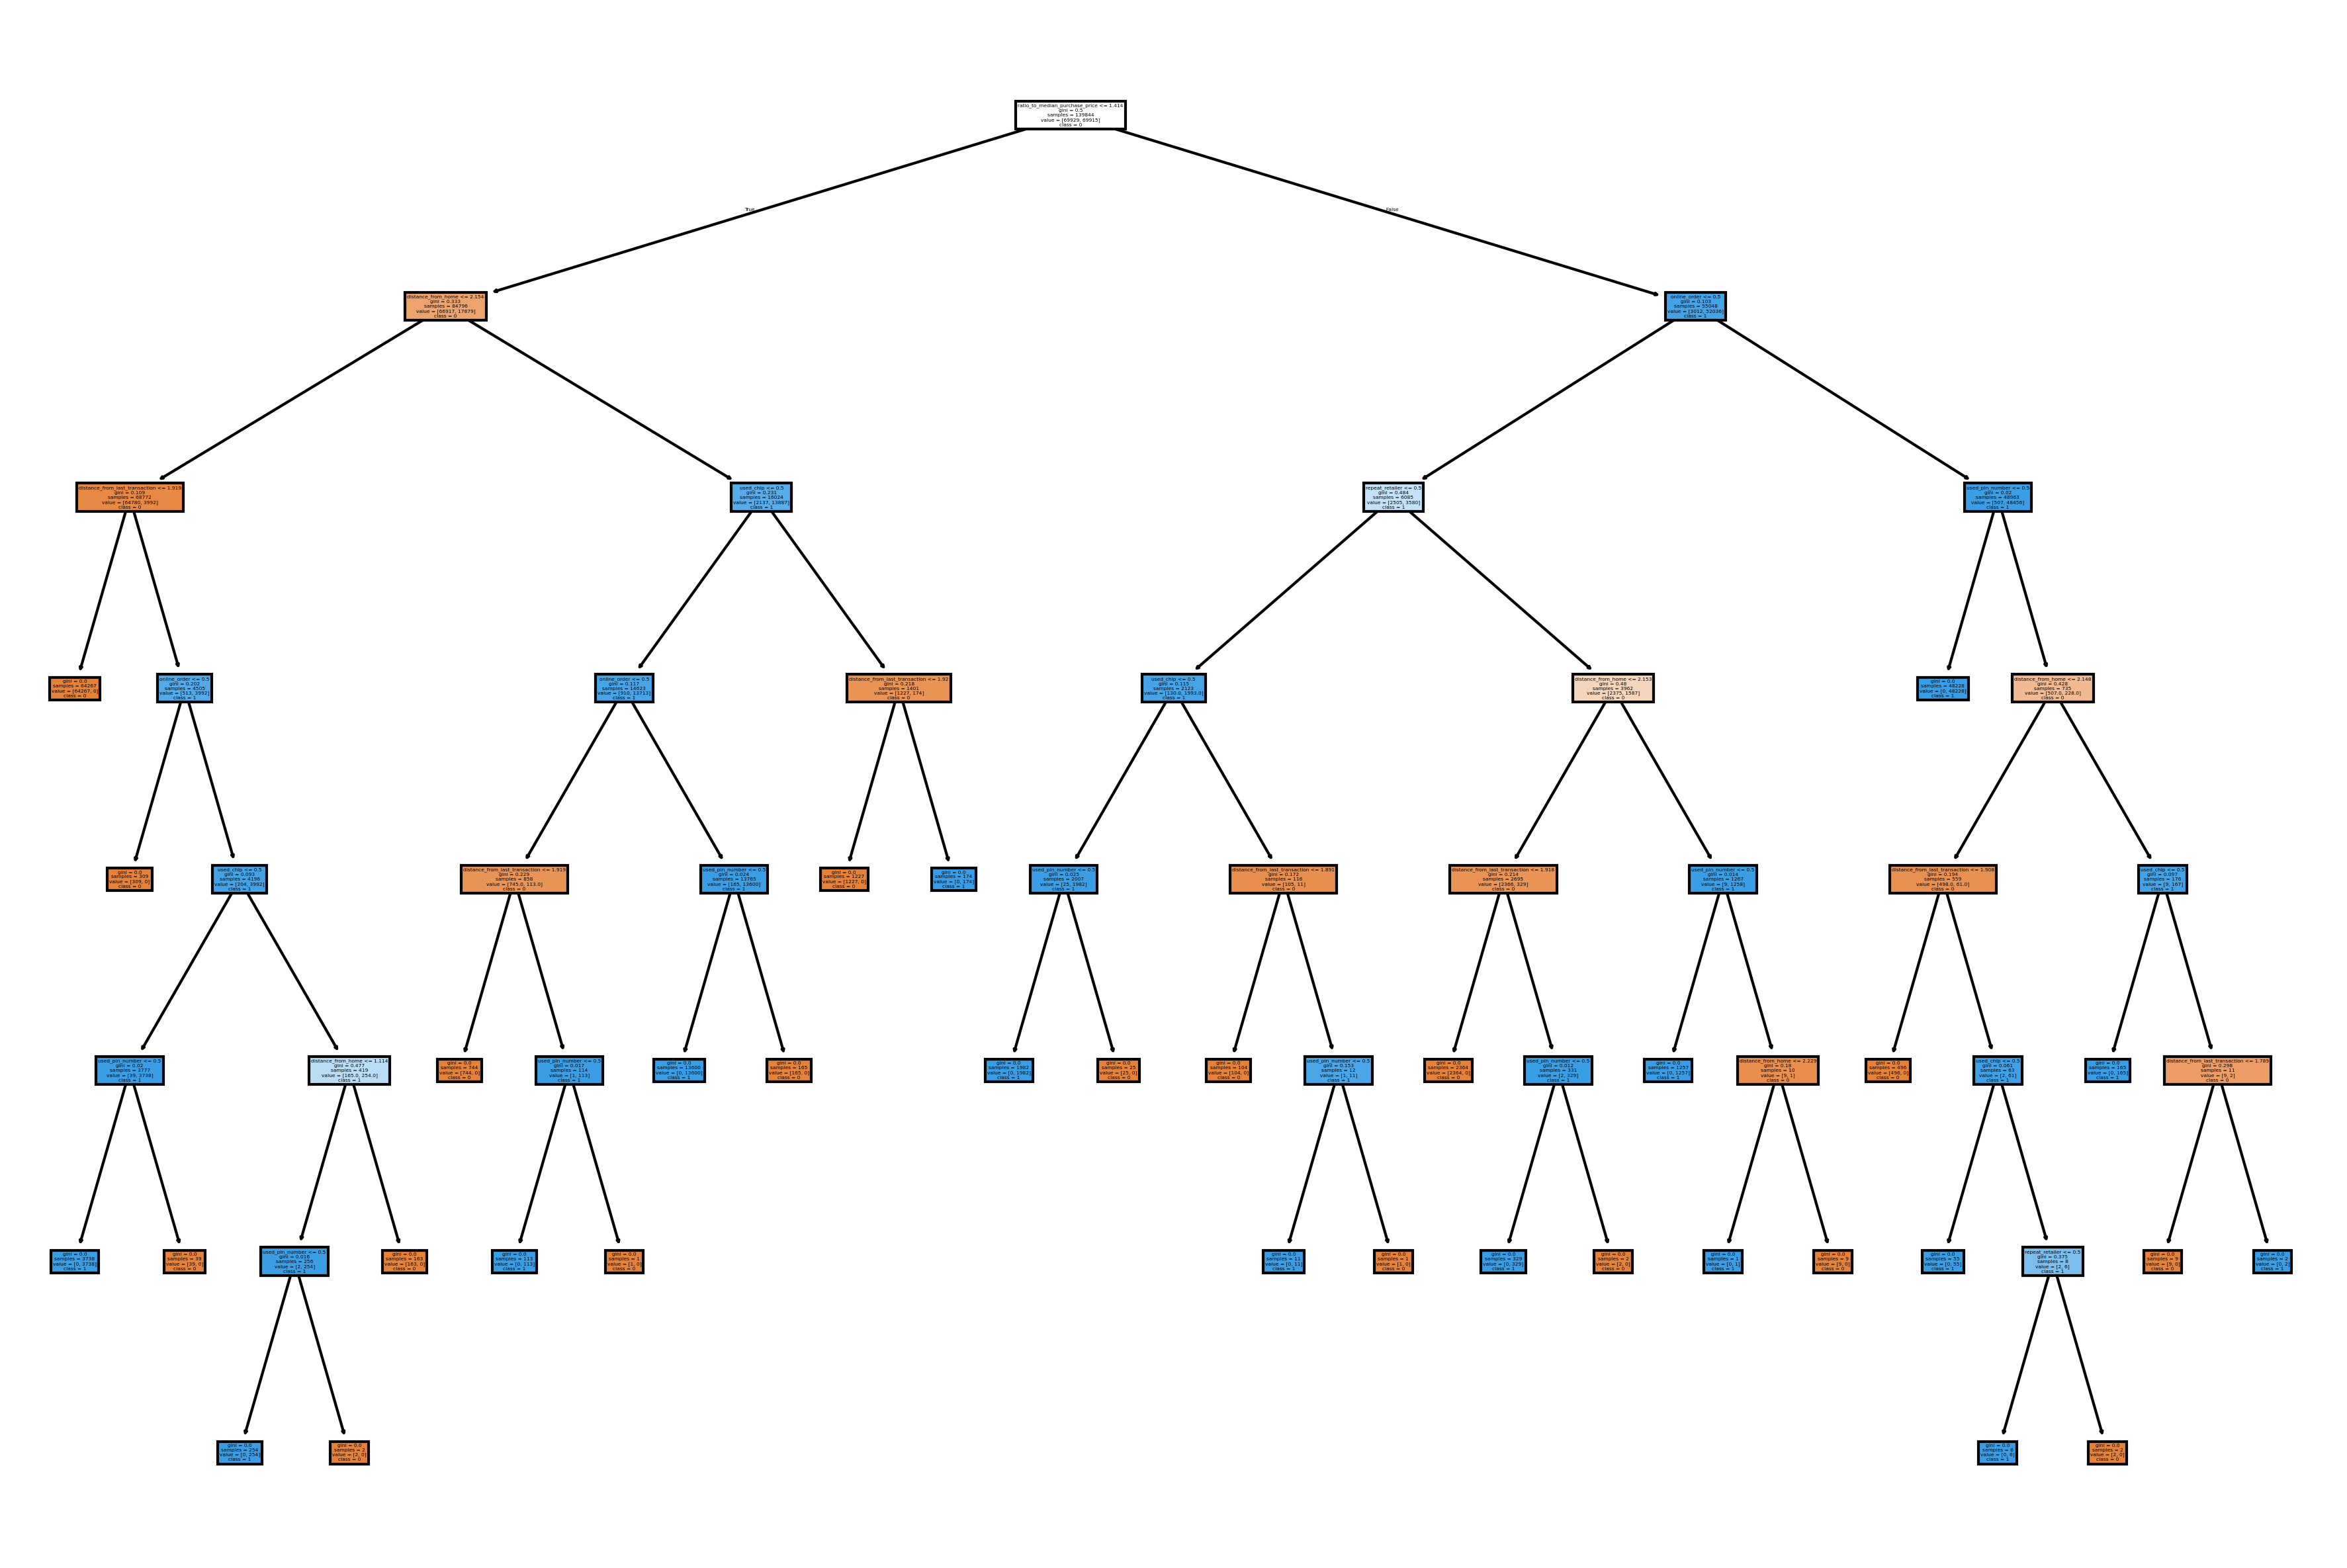

In [108]:
dc_model=DecisionTreeClassifier(random_state=True)
dc_model.fit(X_train,y_train)
pt.figure(figsize=(15,10),dpi=300)
from sklearn.tree import plot_tree
plot_tree(dc_model,filled=True,feature_names=X_train.columns.tolist(),class_names=['0','1'])
pt.show()

In [58]:
estimator= DecisionTreeClassifier(random_state=True)
param_grid={"criterion":['gini','entropy'],'max_depth':list(range(1,7))}
dt_model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
dt_model.fit(X_train,y_train)
dt=dt_model.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=True)

In [61]:
dt_imp=pd.DataFrame(data=dt.feature_importances_,
                    index=X.columns,
                    columns=['importance'])
important_feat_dt=dt_imp[dt_imp["importance"]>0].index.tolist()
important_feat_dt

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'used_chip',
 'used_pin_number',
 'online_order']

In [63]:
X_train_dt = X_train[important_feat_dt]
X_test_dt = X_test[important_feat_dt]
dt= DecisionTreeClassifier(random_state=True,max_depth=6,criterion='gini')
dt.fit(X_train_dt,y_train)
ypred_train_dt= dt.predict(X_train_dt)
ypred_test_dt= dt.predict (X_test_dt)

print("train accuracy :",accuracy_score(y_train, ypred_train_dt))
print("test accuracy :",accuracy_score(y_test,ypred_test_dt))
print("cross val score :",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring="accuracy").mean())


train accuracy : 0.9999713966991791
test accuracy : 0.9999141925519135
cross val score : 0.9996281579585539


# random forest 

In [65]:
estimator = RandomForestClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,50))}
r_model = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
r_model.fit(X_train,y_train)
rt =r_model.best_estimator_

In [68]:
rt

RandomForestClassifier(n_estimators=36, random_state=True)

In [66]:
imp_fea_rf= pd.DataFrame(data=rt.feature_importances_,
                          index=X.columns,
                          columns=["importance"])
importance_feature_rf=imp_fea_rf[imp_fea_rf['importance']>0].index.tolist()
importance_feature_rf

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order']

In [70]:
X_train_rf=X_train[importance_feature_rf]
X_test_rf =X_test[importance_feature_rf]

rf_model=RandomForestClassifier(random_state=True,n_estimators=36)

rf_model.fit(X_train_rf,y_train)

ypred_train_rf=rf_model.predict(X_train_rf)
ypred_test_rf =rf_model.predict(X_test_rf)

print("train accuracy :",accuracy_score(y_train,ypred_train_rf))
print("test accuracy :",accuracy_score(y_test,ypred_test_rf))
print("cross val :",cross_val_score(rf_model,X_train_rf,y_train,cv=5,scoring="accuracy").mean())


train accuracy : 1.0
test accuracy : 0.9999713975173045
cross val : 0.9999070394257192


# ada boost 

In [72]:
estimator= AdaBoostClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,50))}
ad_model = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
ad_model.fit(X_train,y_train)
ad=ad_model.best_estimator_
ad

AdaBoostClassifier(n_estimators=46, random_state=True)

In [74]:
imp_feat_ad= pd.DataFrame(data=ad.feature_importances_,
                          index=X.columns,
                          columns=["importance"])
feature_importance_ad=imp_feat_ad[imp_feat_ad['importance']>0].index.tolist()
feature_importance_ad


['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'used_chip',
 'used_pin_number',
 'online_order']

In [78]:
X_train_ad=X_train[feature_importance_ad]
X_test_ad =X_test[feature_importance_ad]

ad=AdaBoostClassifier(random_state=True,n_estimators=46)
ad.fit(X_train_ad,y_train)

ypred_train_ad= ad.predict(X_train_ad)
ypred_test_ad= ad.predict(X_test_ad)

print("train accuracy :",accuracy_score(y_train,ypred_train_ad))
print("test accuray :",accuracy_score(y_test,ypred_test_ad))
print("cross val :",cross_val_score(ad, X_train_ad,y_train,cv=5,scoring='accuracy').mean())


train accuracy : 0.9994636881096078
test accuray : 0.99942795034609
cross val : 0.9992348635948936


# gradiant boost

In [90]:
estimator=GradientBoostingClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,50)),
            "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.9,1]}
gb_model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
gb_model.fit(X_train,y_train)
gd=gb_model.best_estimator_     
gd

GradientBoostingClassifier(learning_rate=0.7, n_estimators=41,
                           random_state=True)

In [91]:
imp_feature_gd=pd.DataFrame(data=gd.feature_importances_,
                            index=X.columns,
                            columns=["importance"])
importance_feature_gd=imp_feature_gd[imp_feature_gd['importance']>0].index.tolist()
importance_feature_gd

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order']

In [97]:
x_train_gb=X_train[importance_feature_gd]
x_test_gb=X_test[importance_feature_gd]

gb=GradientBoostingClassifier(n_estimators=41,random_state=True,learning_rate=0.7 )
gb.fit(x_train_gb,y_train)

ypred_train_gb=gb.predict(x_train_gb)
ypred_test_gb=gb.predict(x_test_gb)

print("train accuracy :",accuracy_score(y_train,ypred_train_gb))
print("cross val :",cross_val_score(gb,x_train_gb,y_train,cv=5,scoring='accuracy').mean())
print("test accuracy :",accuracy_score(y_test,ypred_test_gb))

train accuracy : 0.9999928491747948
cross val : 0.9999713966480378
test accuracy : 0.9999713975173045


#  Xg boost 

In [101]:
estimator=XGBClassifier()
param_grid={"n_estimators":list(range(1,50)),
            "max_depth":[2,3,4,5],"gamma":[0,0.25,0.5,1]}
xgb_model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
xgb_model.fit(X_train,y_train)
xg=xgb_model.best_estimator_
xg

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=23, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [102]:
imp_feature_xgb=pd.DataFrame(data=xg.feature_importances_,
                            index=X.columns,
                            columns=["importance"])
importance_feature_xgb=imp_feature_xgb[imp_feature_xgb['importance']>0].index.tolist()
importance_feature_xgb

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order']

In [104]:
x_train_xgb=X_train[importance_feature_xgb]
x_test_xgb=X_test[importance_feature_xgb]

xgb=XGBClassifier(n_estimators=23,max_depth=4,gamma=0.5 )
xgb.fit(x_train_gb,y_train)

ypred_train_xgb=xgb.predict(x_train_xgb)
ypred_test_xgb=xgb.predict(x_test_xgb)

print("train accuracy :",accuracy_score(y_train,ypred_train_xgb))
print("cross val :",cross_val_score(xgb,x_train_xgb,y_train,cv=5,scoring='accuracy').mean())
print("test accuracy :",accuracy_score(y_test,ypred_test_xgb))

train accuracy : 0.9982695003003347
cross val : 0.998333860692694
test accuracy : 0.9980264286940106
